# Water Quality Prediction

# import the necessary library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# read the data

In [5]:
df= pd.read_csv("water_potability.csv")

# display first 5 records

In [7]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [8]:
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [9]:
df.shape

(3276, 10)

# Data cleaning

In [11]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [12]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# fill the null values with mean

In [14]:
df = df.fillna(df.mean())

In [15]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


# After filled the null values again check the null values are present or not

In [17]:
df.isnull().sum().sum()

0

# Check the duplicate records

In [19]:
df.duplicated().sum()

0

# EDA

# check the information of the data

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# statistical calculation of the data

In [24]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [25]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [26]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,333.775777,327.459760,16.140368,78.698446,2.309149,1


# value count of the "potability" column

In [28]:
potability_counts = df['Potability'].value_counts()
potability_counts

Potability
0    1998
1    1278
Name: count, dtype: int64

# plot the pie chart for "potability" column

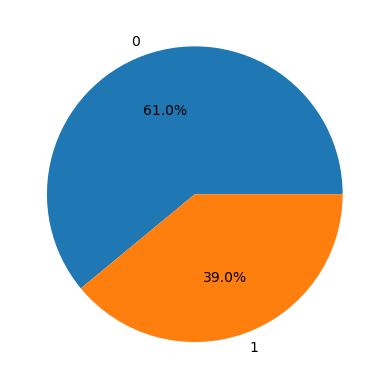

In [30]:
plt.pie(potability_counts, labels=potability_counts.index, autopct='%1.1f%%')
plt.show()

# Decide the dependent and independent features

In [32]:
x = df.drop('Potability',axis=1)
y = df['Potability']

# Our data is not balanced first we have to balanced it.

In [34]:
from imblearn.over_sampling import RandomOverSampler

# Create the object and fit model on x , y 

In [36]:
sample = RandomOverSampler(random_state=42)
x_resampled, y_resampled = sample.fit_resample(x, y)

# Now check the data is balanced

In [38]:
pi=y_resampled.value_counts()

In [39]:
pi

Potability
0    1998
1    1998
Name: count, dtype: int64

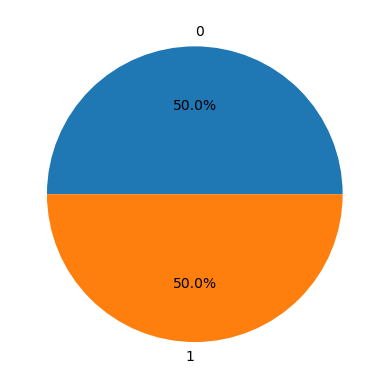

In [40]:
plt.pie(pi, labels=pi.index, autopct='%1.1f%%')
plt.show()

# Data  is  balance using random oversampaler

In [42]:
cr = df.corr()

<Axes: >

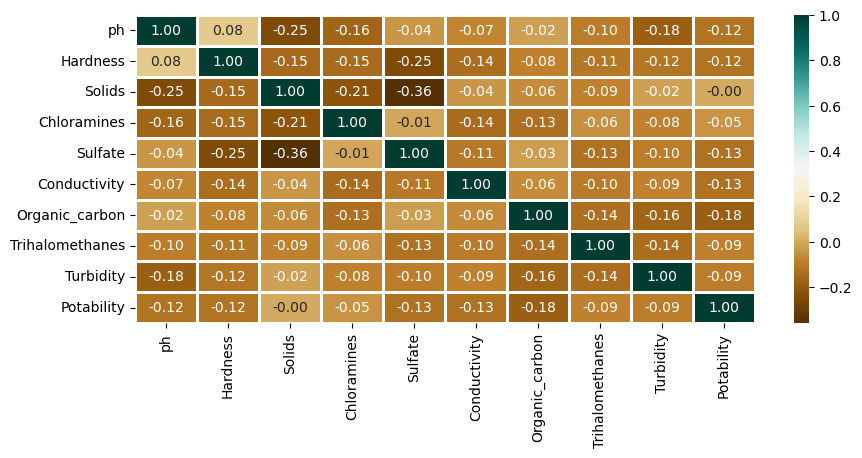

In [43]:
plt.figure(figsize=(10,4))

sns.heatmap(cr.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

# Split the data in training and testing part

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled, test_size = 0.2, random_state = 40)

# Scalling

In [48]:
from sklearn.preprocessing import StandardScaler                     #StandardScaler also used for remove Outlier****************
sc=StandardScaler()
x_sc=sc.fit_transform(x)       
df=pd.DataFrame(x_sc,columns=x.columns)

In [49]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-6.043133e-16,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,3.145987e-15,2.062575,0.270597,-0.638480,0.684218
2,6.928678e-01,0.847665,-0.240047,1.360594,3.145987e-15,-0.094032,0.781117,0.001509,-1.167365
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786
...,...,...,...,...,...,...,...,...,...
3271,-1.641587e+00,-0.081758,2.916188,0.028027,7.242640e-01,1.240155,-0.118075,0.018481,0.601124
3272,4.953704e-01,-0.085667,-0.534295,0.593290,3.145987e-15,-0.417706,1.698560,0.000000,-1.497627
3273,1.591254e+00,-0.626829,1.270810,0.144017,3.145987e-15,0.072263,-0.981329,0.218748,-0.856007
3274,-1.329516e+00,1.041355,-1.144058,-0.517373,3.145987e-15,-0.288597,-0.942064,0.703468,0.950797


# Model selection

logistic regression

decision tree

random forest


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



# Create the object for each model
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# fit the model 
lr.fit(x_train , y_train)
dt.fit(x_train , y_train)
rf.fit(x_train , y_train)


# Predict the data
y_pred_lr = lr.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)



In [53]:
lr.score(x_test,y_test)*100

51.625

In [54]:
dt.score(x_test,y_test)*100

69.625

In [55]:
rf.score(x_test,y_test)*100

77.125

#  Random Forest Classifier is giving the best accuracy with an accuracy score of 77% for the testing dataset.

# check the accuracy of the each model by using classification report


In [58]:
from sklearn.metrics import classification_report

In [59]:
print("logistic regression")
print(classification_report(y_test  , y_pred_lr))
print("-----------------------------------------a")

print("decision tree")
print(classification_report(y_test  , y_pred_dt))
print("-----------------------------------------a")

print("random forest")
print(classification_report(y_test  , y_pred_rf))
print("-----------------------------------------a")



logistic regression
              precision    recall  f1-score   support

           0       0.51      0.56      0.53       393
           1       0.53      0.47      0.50       407

    accuracy                           0.52       800
   macro avg       0.52      0.52      0.52       800
weighted avg       0.52      0.52      0.52       800

-----------------------------------------a
decision tree
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       393
           1       0.69      0.74      0.71       407

    accuracy                           0.70       800
   macro avg       0.70      0.70      0.70       800
weighted avg       0.70      0.70      0.70       800

-----------------------------------------a
random forest
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       393
           1       0.79      0.75      0.77       407

    accuracy                           0.77     

# Random forest model give the best accuracy as compare to other models

# Use pickle for store the best model

In [62]:
import pickle

In [63]:
with open("water_sc" , "wb")as file :
    pickle.dump(rf,file)

In [64]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [65]:
# 1	3.716080	129.422921	18630.057858	6.635246	333.775777	592.885359	15.180013	56.329076	4.500656	0
# 7.874671	195.102299	17404.177061	7.509306	333.775777	327.459760	16.140368	78.698446	2.309149	1


In [66]:
data = {
    "ph": [3.716080],
    "Hardness": [129.422921],
    "Solids": [18630.057858],
    "Chloramines": [6.635246],
    "Sulfate": [333.775777],
    "Conductivity": [592.885359],
    "Organic_carbon": [15.180013],
    "Trihalomethanes": [56.329076],
    "Turbidity": [4.500656]
}

# Convert to DataFrame
df_input = pd.DataFrame(data)

In [67]:
df_input

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,3.71608,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656


In [68]:
rf.predict(df_input)

array([0], dtype=int64)

In [69]:
# Make the prediction
prediction = rf.predict(df_input)

# Print the predicted Loan Status
Water_q = 'Bad Quality' if prediction[0] == 0 else 'Good Quality'
print("Water Quality Prediction:", Water_q)

Water Quality Prediction: Bad Quality


In [70]:
# 7.874671	195.102299	17404.177061	7.509306	333.775777	327.459760	16.140368	78.698446	2.309149	1

In [71]:
data = {
    "ph": [7.874671],
    "Hardness": [195.102299],
    "Solids": [17404.177061],
    "Chloramines": [7.509306],
    "Sulfate": [333.775777],
    "Conductivity": [327.459760],
    "Organic_carbon": [16.140368],
    "Trihalomethanes": [78.698446],
    "Turbidity": [2.309149]
}

# Convert to DataFrame
df1_input = pd.DataFrame(data)

In [72]:
df1_input

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.874671,195.102299,17404.177061,7.509306,333.775777,327.45976,16.140368,78.698446,2.309149


In [73]:
rf.predict(df1_input)

array([1], dtype=int64)

In [74]:
# Make the prediction
prediction = rf.predict(df1_input)

# Print the predicted Loan Status
Water_q = 'Bad Quality' if prediction[0] == 0 else 'Good Quality'
print("Water Quality Prediction:", Water_q)

Water Quality Prediction: Good Quality


# Use pickle for store the best model

In [76]:
import pickle

In [77]:
with open("model_sc" , "wb")as file :
    pickle.dump(rf,file)
    

In [78]:
with open("water_sc" , "wb")as file :
    pickle.dump(sc,file)

# GUI 

In [80]:
from tkinter import *
import numpy as np
import pickle

# Create main window
win = Tk()
win.title('WATER QUALITY PREDICTION')
win.geometry('800x600')
win.config(bg='pink')

# Define input variables
variables = [StringVar() for _ in range(9)]

# Function to predict water quality
def disp():
    try:
        values = [float(var.get()) for var in variables]
        list1 = [values]

        with open("water_sc", "rb") as f:
            sc = pickle.load(f)

        with open("model_sc", "rb") as f:
            model = pickle.load(f)

        a_sc = sc.transform(list1)
        result = model.predict(a_sc)

        # Display result
        z = "Water is Potable (Safe)" if result[0] == 1 else "Water is Not Potable (Unsafe)"
        output_label.config(text=z)
    except ValueError:
        output_label.config(text="Invalid input. Enter numbers only.")

# Title Label
Label(win, text='WATER QUALITY PREDICTION SYSTEM', bg='white', fg='black', width=40, bd=5, relief='ridge',
      font=('times new roman', 18, 'bold')).place(x=100, y=8)

# Labels and Entry fields for input
labels = ["pH (0 to 14)", "Hardness (0 to 300)", "Solids (20000 to 100000)", "Chloramines (0 to 10)", 
          "Sulfate (0 to 500)", "Conductivity (0 to 1500)", "Organic Carbon (0 to 100)", 
          "Trihalomethanes (0 to 80)", "Turbidity (0 to 10)"]

for i, (label_text, var) in enumerate(zip(labels, variables)):
    Label(win, text=label_text, bg="white", fg="black", width=20, bd=5, relief="ridge",
          font=("times new roman", 14, "bold")).place(x=50, y=50 + i * 40)
    
    Entry(win, textvariable=var, bg="white", fg="black", width=30, bd=5, relief="ridge",
          font=("times new roman", 14, "bold")).place(x=300, y=50 + i * 40)

# Prediction Button
Button(win, command=disp, text="Predict Water Quality", bg="black", fg="white", width=20, bd=5, relief="ridge",
       font=("times new roman", 14, "bold")).place(x=200, y=450)

# Output Label
output_label = Label(win, text='Quality of Water is', bg='green', fg='white', height=4, width=50, bd=5, relief='ridge',
                     font=('times new roman', 14, 'bold'))
output_label.place(x=800, y=200)

win.mainloop()
